In [3]:
from astropy.io import fits
import pandas as pd
from astropy import modeling
import numpy as np
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats import norm
#from skimage.measure import profile_line
from scipy.interpolate import RectBivariateSpline
from astropy.table import Table
from scipy.interpolate import griddata
from astropy.convolution import Gaussian2DKernel
from scipy.signal import resample, resample_poly
from astropy.convolution import convolve

mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [15]:
ant_names = ['RT2', 'RT3', 'RT4', 'RT5', 'RT6', 'RT7', 'RT8', 'RT9', 'RTA', 'RTB','RTC', 'RTD']


def plot_bw(ant, sb, name, title):
    #ant = 3
    #sb = 150

    #df_x = pd.read_csv('/tank/denes/beam_weights/weights{:02}_X.dat'.format(ant), delimiter=' ', header=None)
    #df_y = pd.read_csv('/tank/denes/beam_weights/weights{:02}_Y.dat'.format(ant), delimiter=' ', header=None)
    
    df_x = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_X.dat'.format(name, ant), delimiter=' ', header=None)
    df_y = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_Y.dat'.format(name, ant), delimiter=' ', header=None)

    df_x = pd.DataFrame(df_x)
    df_y = pd.DataFrame(df_y)

    # put data into right place

    XX = np.array(df_x.iloc[sb][1:65])
    YY = np.array(df_y.iloc[sb][1:65])

    XX_1 = XX[::2]
    XX_2 = XX[1::2]
    YY_1 = YY[::2]
    YY_2 = YY[1::2]

    c = np.array([XX,YY])
    c_1 = np.array([XX_1,YY_2])
    c_2 = np.array([YY_1,XX_2])

    #print(c.shape)
    #print(c.T[:6])
    #print(c_1.T)

    c1 = c_1.T.reshape(64,1)[:11]
    c2 = c_2.T.reshape(64,1)[:11]
    c3 = c_1.T.reshape(64,1)[11:22]
    c4 = c_2.T.reshape(64,1)[11:22]
    c5 = c_1.T.reshape(64,1)[22:33]
    c6 = c_2.T.reshape(64,1)[22:33]
    c7 = c_1.T.reshape(64,1)[33:44]
    c8 = c_2.T.reshape(64,1)[33:44]
    c9 = c_1.T.reshape(64,1)[44:55]
    c10 = c_2.T.reshape(64,1)[44:55]
    c11 = c.T[55:61][:]

    #print(len(c1))

    #c1_2 = c1.reshape(22,1)
    #c2_2 = c2.reshape(22,1)
    #c3_2 = c3.reshape(22,1)
    #c4_2 = c4.reshape(22,1)
    #c5_2 = c5.reshape(22,1)
    c11_2 = c11.reshape(12,1)

    #bw_0 = np.concatenate((c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11_2[:11]), axis=1)
    bw_0 = np.concatenate((c1, c2, c4, c3, c5, c6, c8, c7, c9, c10, c11_2[:11]), axis=1)
    
    mx = np.max(bw_0)
    bw_0[bw_0 == 0.] = 'nan'
    
    #print(bw_0.shape)

    #bw

    # plot beam weights

    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    ax.set_title('{} {}'.format(title, ant_names[ant]), fontsize = 20)
    # BW normalised to 1
    cb = plt.imshow(bw_0/mx)
    #ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    #plt.gca().invert_yaxis()
    cbar = fig.colorbar(cb)
    cbar.ax.tick_params(labelsize=18) 
    fig.savefig('/tank/denes/beam_weights/{}_BW_sb{}_ant{:02}.png'.format(name, sb, ant), dpi=200, bbox_inches="tight")

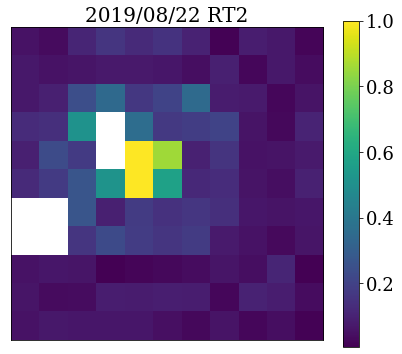

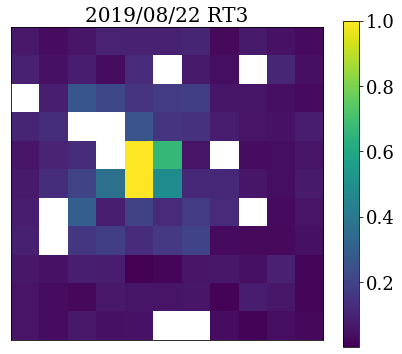

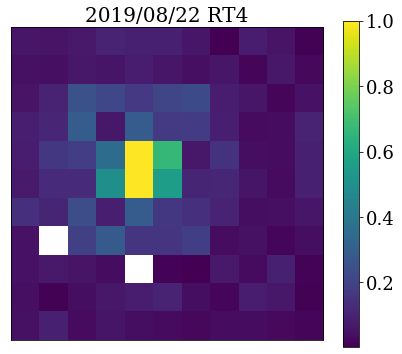

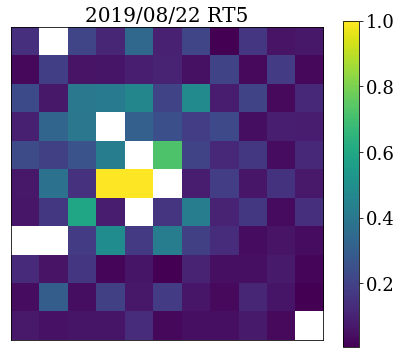

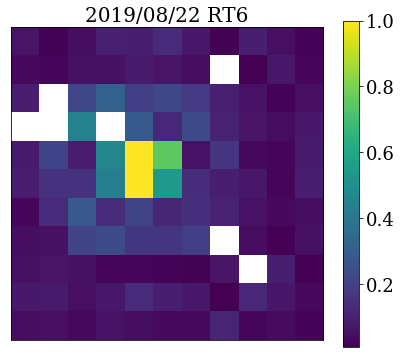

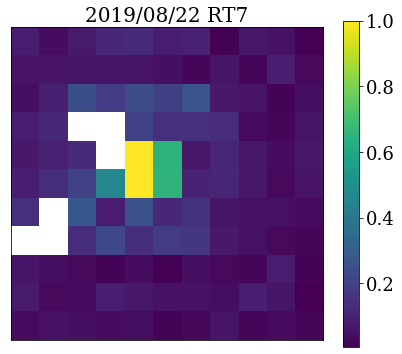

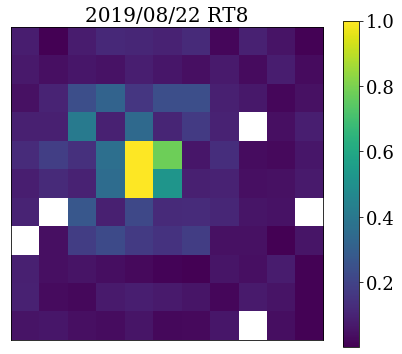

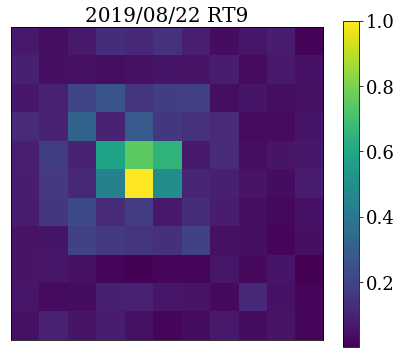

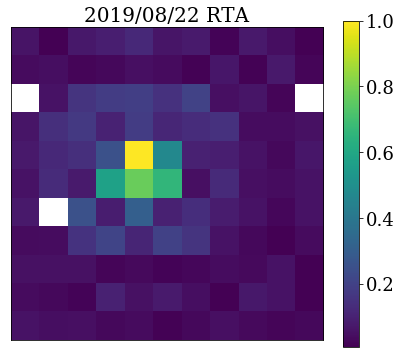

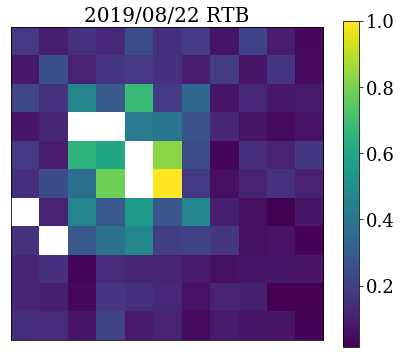

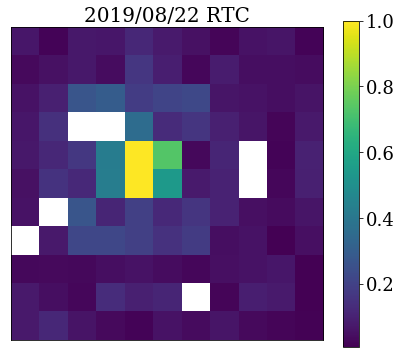

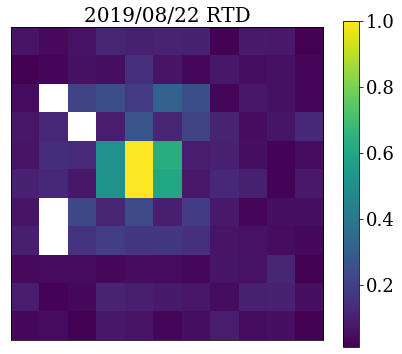

In [17]:
for ant in range(12):
    #plot_bw(ant, 0, 'WSRTA201103084_B000', '2020/11/03')
    #plot_bw(ant, 288, 'WSRTA210207034_B039', '2021/02/07')
    plot_bw(ant, 288, 'S1025+5550_B18', '2019/08/22')
    
    

In [ ]:
## def plot_bw_all(sb, name):

    fig = plt.figure(figsize=(13,11))
    
    for ant in range(12):
        
        df_x = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_X.dat'.format(name, ant), delimiter=' ', header=None)
        df_y = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_Y.dat'.format(name, ant), delimiter=' ', header=None)

        df_x = pd.DataFrame(df_x)
        df_y = pd.DataFrame(df_y)

        # put data into right place

        XX = np.array(df_x.iloc[sb][1:65])
        YY = np.array(df_y.iloc[sb][1:65])

        XX_1 = XX[::2]
        XX_2 = XX[1::2]
        YY_1 = YY[::2]
        YY_2 = YY[1::2]

        c = np.array([XX,YY])
        c_1 = np.array([XX_1,YY_2])
        c_2 = np.array([YY_1,XX_2])

        c1 = c_1.T.reshape(64,1)[:11]
        c2 = c_2.T.reshape(64,1)[:11]
        c3 = c_1.T.reshape(64,1)[11:22]
        c4 = c_2.T.reshape(64,1)[11:22]
        c5 = c_1.T.reshape(64,1)[22:33]
        c6 = c_2.T.reshape(64,1)[22:33]
        c7 = c_1.T.reshape(64,1)[33:44]
        c8 = c_2.T.reshape(64,1)[33:44]
        c9 = c_1.T.reshape(64,1)[44:55]
        c10 = c_2.T.reshape(64,1)[44:55]
        c11 = c.T[55:61][:]
        c11_2 = c11.reshape(12,1)

        bw_0 = np.concatenate((c1, c2, c4, c3, c5, c6, c8, c7, c9, c10, c11_2[:11]), axis=1)

        bw_0[bw_0 == 0.] = 'nan'

        # plot beam weights

        ax = fig.add_subplot(3,4,ant+1)
        ax.set_title('ant {}'.format(ant), fontsize = 16)
        cb = plt.imshow(bw_0)
        #ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        plt.gca().invert_yaxis()
    #fig.colorbar(cb)
    
    
    fig.savefig('/tank/denes/beam_weights/{}_BW_sb{}.png'.format(name, sb), dpi=200)
    
    
#plot_bw_all(0, 'WSRTA210207034_B039')
#plot_bw_all(0, 'WSRTA201103084_B000')
plot_bw_all(0, 'S1025+5550_B18')


In [ ]:
def plot_bw_all_interpol(sb, name):

    fig = plt.figure(figsize=(13,11))
    
    for ant in range(12):
        
        df_x = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_X.dat'.format(name, ant), delimiter=' ', header=None)
        df_y = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_Y.dat'.format(name, ant), delimiter=' ', header=None)

        df_x = pd.DataFrame(df_x)
        df_y = pd.DataFrame(df_y)

        # put data into right place

        XX = np.array(df_x.iloc[sb][1:65])
        YY = np.array(df_y.iloc[sb][1:65])

        XX_1 = XX[::2]
        XX_2 = XX[1::2]
        YY_1 = YY[::2]
        YY_2 = YY[1::2]

        c = np.array([XX,YY])
        c_1 = np.array([XX_1,YY_2])
        c_2 = np.array([YY_1,XX_2])

        c1 = c_1.T.reshape(64,1)[:11]
        c2 = c_2.T.reshape(64,1)[:11]
        c3 = c_1.T.reshape(64,1)[11:22]
        c4 = c_2.T.reshape(64,1)[11:22]
        c5 = c_1.T.reshape(64,1)[22:33]
        c6 = c_2.T.reshape(64,1)[22:33]
        c7 = c_1.T.reshape(64,1)[33:44]
        c8 = c_2.T.reshape(64,1)[33:44]
        c9 = c_1.T.reshape(64,1)[44:55]
        c10 = c_2.T.reshape(64,1)[44:55]
        c11 = c.T[55:61][:]
        c11_2 = c11.reshape(12,1)

        bw_0 = np.concatenate((c1, c2, c4, c3, c5, c6, c8, c7, c9, c10, c11_2[:11]), axis=1)
        bw_0v2 = resample_poly(bw_0, up=88, down=15,  axis=0)
        bw_0v3 = resample_poly(bw_0v2, up=88, down=15, axis=1)
        
        print(bw_0v3.shape)
        
        kernel = Gaussian2DKernel(5)
        astropy_conv = convolve(bw_0v3, kernel)

        # create a "reconstructed" image with NaNs replaced by interpolated values
        #reconstructed_image = interpolate_replace_nans(new_img, kernel)

        
        #bw_0[bw_0 == 0.] = 'nan'

        # plot beam weights

        ax = fig.add_subplot(3,4,ant+1)
        ax.set_title('ant {}'.format(ant), fontsize = 16)
        # smoothed data:
        #cb = plt.imshow(astropy_conv)
        #plt.contour(astropy_conv/np.max(astropy_conv), levels=np.arange(0.2,1,0.2), colors='w')
        # unsmoothed data:
        cb = plt.imshow(bw_0v3)
        plt.contour(bw_0v3/np.max(bw_0v3), levels=np.arange(0.2,1,0.2), colors='w')
        
        #ax.tick_params(axis='both', which='major', labelsize=14)
        ax.set_xticks([], [])
        ax.set_yticks([], [])
        plt.gca().invert_yaxis()
    #fig.colorbar(cb)
    
    
    fig.savefig('/tank/denes/beam_weights/{}_BW_sb{}_test_v1.png'.format(name, sb), dpi=200)
    

#plot_bw_all_interpol(0, 'S1025+5550_B18')
plot_bw_all_interpol(0, 'WSRTA210207034_B039')
#plot_bw_all_interpol(0, 'WSRTA201103084_B000')

In [ ]:
def plot_bw_all_interpol_avg(sb, name):
    
    BW = []
    
    for ant in range(12):
        
        df_x = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_X.dat'.format(name, ant), delimiter=' ', header=None)
        df_y = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_Y.dat'.format(name, ant), delimiter=' ', header=None)

        df_x = pd.DataFrame(df_x)
        df_y = pd.DataFrame(df_y)

        # put data into right place

        XX = np.array(df_x.iloc[sb][1:65])
        YY = np.array(df_y.iloc[sb][1:65])

        XX_1 = XX[::2]
        XX_2 = XX[1::2]
        YY_1 = YY[::2]
        YY_2 = YY[1::2]

        c = np.array([XX,YY])
        c_1 = np.array([XX_1,YY_2])
        c_2 = np.array([YY_1,XX_2])

        c1 = c_1.T.reshape(64,1)[:11]
        c2 = c_2.T.reshape(64,1)[:11]
        c3 = c_1.T.reshape(64,1)[11:22]
        c4 = c_2.T.reshape(64,1)[11:22]
        c5 = c_1.T.reshape(64,1)[22:33]
        c6 = c_2.T.reshape(64,1)[22:33]
        c7 = c_1.T.reshape(64,1)[33:44]
        c8 = c_2.T.reshape(64,1)[33:44]
        c9 = c_1.T.reshape(64,1)[44:55]
        c10 = c_2.T.reshape(64,1)[44:55]
        c11 = c.T[55:61][:]
        c11_2 = c11.reshape(12,1)

        bw_0 = np.concatenate((c1, c2, c4, c3, c5, c6, c8, c7, c9, c10, c11_2[:11]), axis=1)
        bw_0v2 = resample_poly(bw_0, up=88, down=15,  axis=0)
        bw_0v3 = resample_poly(bw_0v2, up=88, down=15,  axis=1)
        BW.append(bw_0v3)
        
        kernel = Gaussian2DKernel(5)
        astropy_conv = convolve(bw_0v3, kernel)

        # create a "reconstructed" image with NaNs replaced by interpolated values
        #reconstructed_image = interpolate_replace_nans(new_img, kernel)

        
        #bw_0[bw_0 == 0.] = 'nan'

        # plot beam weights
    fig = plt.figure(figsize=(13,11))
    ax = fig.add_subplot(1,1,1)
    ax.set_title('average BW', fontsize = 16)
    #cb = plt.imshow(astropy_conv)
    #plt.contour(astropy_conv/np.max(astropy_conv), levels=np.arange(0.2,1,0.2), colors='w')
    cb = plt.imshow(np.mean(BW, axis=0))
    plt.contour(np.mean(BW, axis=0)/np.max(np.mean(BW, axis=0)), levels=np.arange(0.2,1,0.2), colors='w')

    #ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    plt.gca().invert_yaxis()
    #fig.colorbar(cb)
    
    
    fig.savefig('/tank/denes/beam_weights/{}_BW_sb{}_test_average_v1.png'.format(name, sb), dpi=200)
    

#plot_bw_all_interpol_avg(0, 'WSRTA210207034_B039')
plot_bw_all_interpol_avg(203, 'WSRTA201103084_B000')
#plot_bw_all_interpol_avg(203, 'S1025+5550_B18')

# Testing

In [ ]:
# Set XX pol to 0 to test pattern

def plot_bw_YY(ant, sb, name):
    #ant = 3
    #sb = 150

    #df_x = pd.read_csv('/tank/denes/beam_weights/weights{:02}_X.dat'.format(ant), delimiter=' ', header=None)
    #df_y = pd.read_csv('/tank/denes/beam_weights/weights{:02}_Y.dat'.format(ant), delimiter=' ', header=None)
    
    df_x = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_X.dat'.format(name, ant), delimiter=' ', header=None)
    df_y = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_Y.dat'.format(name, ant), delimiter=' ', header=None)

    df_x = pd.DataFrame(df_x)
    df_y = pd.DataFrame(df_y)

    # put data into right place

    #XX = np.array(df_x.iloc[sb][1:65])
    XX = np.zeros(shape=(64))
    print(XX)
    
    YY = np.array(df_y.iloc[sb][1:65])

    XX_1 = XX[::2]
    XX_2 = XX[1::2]
    YY_1 = YY[::2]
    YY_2 = YY[1::2]

    c = np.array([XX,YY])
    c_1 = np.array([XX_1,YY_2])
    c_2 = np.array([YY_1,XX_2])

    print(XX.shape)
    #print(c.T[:6])
    #print(c_1.T)

    c1 = c_1.T.reshape(64,1)[:11]
    c2 = c_2.T.reshape(64,1)[:11]
    c3 = c_1.T.reshape(64,1)[11:22]
    c4 = c_2.T.reshape(64,1)[11:22]
    c5 = c_1.T.reshape(64,1)[22:33]
    c6 = c_2.T.reshape(64,1)[22:33]
    c7 = c_1.T.reshape(64,1)[33:44]
    c8 = c_2.T.reshape(64,1)[33:44]
    c9 = c_1.T.reshape(64,1)[44:55]
    c10 = c_2.T.reshape(64,1)[44:55]
    c11 = c.T[55:61][:]

    #print(len(c1))

    #c1_2 = c1.reshape(22,1)
    #c2_2 = c2.reshape(22,1)
    #c3_2 = c3.reshape(22,1)
    #c4_2 = c4.reshape(22,1)
    #c5_2 = c5.reshape(22,1)
    c11_2 = c11.reshape(12,1)

    #bw_0 = np.concatenate((c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11_2[:11]), axis=1)
    bw_0 = np.concatenate((c1, c2, c4, c3, c5, c6, c8, c7, c9, c10, c11_2[:11]), axis=1)

    #print(bw_0.shape)

    #bw

    # plot beam weights

    fig = plt.figure()
    cb = plt.imshow(bw_0)
    #plt.gca().invert_yaxis()
    fig.colorbar(cb)
    fig.savefig('/tank/denes/beam_weights/test_YY.png'.format(name, sb, ant))

In [ ]:
for ant in range(1):
    #plot_bw_YY(ant, 0, 'WSRTA201103084_B000')
    plot_bw_YY(ant, 0, 'WSRTA210207034_B039')

In [ ]:
# Set XX pol to 0 to test pattern

def plot_bw_XX(ant, sb, name):
    #ant = 3
    #sb = 150

    #df_x = pd.read_csv('/tank/denes/beam_weights/weights{:02}_X.dat'.format(ant), delimiter=' ', header=None)
    #df_y = pd.read_csv('/tank/denes/beam_weights/weights{:02}_Y.dat'.format(ant), delimiter=' ', header=None)
    
    df_x = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_X.dat'.format(name, ant), delimiter=' ', header=None)
    df_y = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_Y.dat'.format(name, ant), delimiter=' ', header=None)

    df_x = pd.DataFrame(df_x)
    df_y = pd.DataFrame(df_y)

    # put data into right place

    XX = np.array(df_x.iloc[sb][1:65])
    YY = np.zeros(shape=(64))
    #print(XX)
    #YY = np.array(df_y.iloc[sb][1:65])

    XX_1 = XX[::2]
    XX_2 = XX[1::2]
    YY_1 = YY[::2]
    YY_2 = YY[1::2]

    c = np.array([XX,YY])
    c_1 = np.array([XX_1,YY_2])
    c_2 = np.array([YY_1,XX_2])

    print(XX.shape)
    #print(c.T[:6])
    #print(c_1.T)

    c1 = c_1.T.reshape(64,1)[:11]
    c2 = c_2.T.reshape(64,1)[:11]
    c3 = c_1.T.reshape(64,1)[11:22]
    c4 = c_2.T.reshape(64,1)[11:22]
    c5 = c_1.T.reshape(64,1)[22:33]
    c6 = c_2.T.reshape(64,1)[22:33]
    c7 = c_1.T.reshape(64,1)[33:44]
    c8 = c_2.T.reshape(64,1)[33:44]
    c9 = c_1.T.reshape(64,1)[44:55]
    c10 = c_2.T.reshape(64,1)[44:55]
    c11 = c.T[55:61][:]

    #print(len(c1))

    #c1_2 = c1.reshape(22,1)
    #c2_2 = c2.reshape(22,1)
    #c3_2 = c3.reshape(22,1)
    #c4_2 = c4.reshape(22,1)
    #c5_2 = c5.reshape(22,1)
    c11_2 = c11.reshape(12,1)

    #bw_0 = np.concatenate((c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11_2[:11]), axis=1)
    bw_0 = np.concatenate((c1, c2, c4, c3, c5, c6, c8, c7, c9, c10, c11_2[:11]), axis=1)

    #print(bw_0.shape)

    #bw

    # plot beam weights

    fig = plt.figure()
    cb = plt.imshow(bw_0)
    #plt.gca().invert_yaxis()
    fig.colorbar(cb)
    fig.savefig('/tank/denes/beam_weights/test_XX.png'.format(name, sb, ant))

In [ ]:
for ant in range(1):
    plot_bw_XX(ant, 0, 'WSRTA201103084_B000')

In [ ]:
# Set XX pol to 0 to test pattern

def plot_bw_YY_v2(ant, sb, name):
    #ant = 3
    #sb = 150

    #df_x = pd.read_csv('/tank/denes/beam_weights/weights{:02}_X.dat'.format(ant), delimiter=' ', header=None)
    #df_y = pd.read_csv('/tank/denes/beam_weights/weights{:02}_Y.dat'.format(ant), delimiter=' ', header=None)
    
    df_x = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_X.dat'.format(name, ant), delimiter=' ', header=None)
    df_y = pd.read_csv('/tank/denes/beam_weights/{}_weights{:02}_Y.dat'.format(name, ant), delimiter=' ', header=None)

    df_x = pd.DataFrame(df_x)
    df_y = pd.DataFrame(df_y)

    # put data into right place

    #XX = np.array(df_x.iloc[sb][1:65])
    XX = np.zeros(shape=(64))
    print(XX)
    
    YY = np.array(df_y.iloc[sb][1:65])

    XX_1 = XX[::2]
    XX_2 = XX[1::2]
    YY_1 = YY[::2]
    YY_2 = YY[1::2]

    c = np.array([XX,YY])
    c_1 = np.array([XX_1,YY_2])
    c_2 = np.array([YY_1,XX_2])

    print(XX.shape)
    #print(c.T[:6])
    #print(c_1.T)

    c1 = c_1.T.reshape(64,1)[:11]
    c2 = c_2.T.reshape(64,1)[:11]
    c3 = c_1.T.reshape(64,1)[11:22]
    c4 = c_2.T.reshape(64,1)[11:22]
    c5 = c_1.T.reshape(64,1)[22:33]
    c6 = c_2.T.reshape(64,1)[22:33]
    c7 = c_1.T.reshape(64,1)[33:44]
    c8 = c_2.T.reshape(64,1)[33:44]
    c9 = c_1.T.reshape(64,1)[44:55]
    c10 = c_2.T.reshape(64,1)[44:55]
    c11 = c.T[55:61][:]

    #print(len(c1))

    #c1_2 = c1.reshape(22,1)
    #c2_2 = c2.reshape(22,1)
    #c3_2 = c3.reshape(22,1)
    #c4_2 = c4.reshape(22,1)
    #c5_2 = c5.reshape(22,1)
    c11_2 = c11.reshape(12,1)

    #bw_0 = np.concatenate((c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11_2[:11]), axis=1)
    bw_0 = np.concatenate((c1, c2, c4, c3, c5, c6, c8, c7, c9, c10, c11_2[:11]), axis=1)

    #print(bw_0.shape)

    bw_0_v2 = resample(bw_0,66, axis=0)
    bw = resample(bw_0_v2,66, axis=1)

    # plot beam weights

    fig = plt.figure()
    cb = plt.imshow(bw)
    #plt.gca().invert_yaxis()
    fig.colorbar(cb)
    fig.savefig('/tank/denes/beam_weights/test_YY_v2.png'.format(name, sb, ant))

In [ ]:
for ant in range(1):
    #plot_bw_YY(ant, 0, 'WSRTA201103084_B000')
    plot_bw_YY_v2(ant, 0, 'WSRTA210207034_B039')